In [1]:

 import SystemRequirements::*;package SystemRequirements {
    
    requirement <'SR'> HAPSystemRequirements {

        requirement <'SR1'> FunctionalRequirements {

            requirement <'SR1.1'> EarthObservationCapability {
                doc /* The HAP shall provide continuous Earth observation capabilities using onboard imaging and sensing payloads. */
            }

            requirement <'SR1.2'> EnvironmentMonitoringSystem {
                doc /* The HAP shall include environmental sensoring payloads to monitor and detect natural disasters such as wildfires, landslides, and storms. */
            }

            requirement <'SR1.3'> MaritimeSurveillanceSystem {
                doc /* The HAP shall provide maritime surveillance using radar and optical sensors for coastal and open-sea monitoring. */
            }

            requirement <'SR1.4'> AnimalTrackingSystem {
                doc /* The HAP shall support tracking of animal movements using radar and optical sensors. */
            }

            requirement <'SR1.5'> FloodDetectionSystem {
                doc /* The HAP shall be capable of detecting and monitoring flood-prone regions using remote sensing technologies. */
            }

            requirement <'SR1.6'> AirQualityMonitoringSystem {
                doc /* The HAP shall measure and analyze atmospheric air quality parameters. */
            }
        }


        requirement <'SR2'> DesignConstraintsAndPerformance {

            requirement <'SR2.1'> LightweightStructure {
                doc /* The total structural mass of the HAP shall not exceed 130 kilograms. */
            }

            requirement <'SR2.2'> SolarEnergySubsystem {
                doc /* The HAP shall integrate a photovoltaic system as a primary power source. */
            }

            requirement <'SR2.3'> BatteryBackupSystem {
                doc /* The HAP shall include rechargeable battery systems to ensure power availability during non-solar hours upto 90 days. */
            }

            requirement <'SR2.4'> TemperatureOperatingRange {
                doc /* The HAP shall operate reliably in an ambient temperature range between -60°C and +60°C. */
            }

            requirement <'SR2.5'> OperationalAltitude {
                doc /* The HAP shall maintain flight operations at an altitude of 20 kilometers within the stratosphere. */
            }

            requirement <'SR2.6'> AltitudeCeilingConstraint {
                doc /* The HAP shall not exceed a maximum altitude of 20 kilometers. */
            }

            requirement <'SR2.7'> WingSpanLimit {
                doc /* The wingspan of the HAP shall not exceed 27 meters. */
            }

            requirement <'SR2.8'> PlatformLengthConstraint {
                doc /* The fuselage or main body length of the HAP shall not exceed 11 meters. */
            }
        }
    }
}


Package SystemRequirements (5c89303d-3baf-4101-8dc2-7e242e4c2b29)


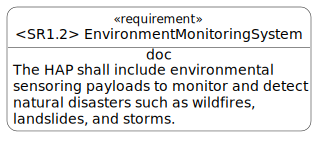

In [3]:
%viz  SystemRequirements::HAPSystemRequirements::FunctionalRequirements::EnvironmentMonitoringSystem

In [2]:
package systemStructure {

  part def HighAltitudePlatformSystem {
    part payload{
        
        part  EarthObservationSubsystem {}
        part  EnvironmentMonitoringSubsystem {}
        part  SurveillanceSubsystem {}
       //// part  TrackingSubsystem {}
        //part  DisasterMonitoringSubsystem {}
        ///part  AirQualitySubsystem {}
             
    }

 part structure {
        part  SolarPowerSubsystem {}
        part  EnergyStorageSubsystem {}
        part  FlightControlSubsystem {}
        part  ThermalManagementSubsystem {}
        part  StructuralSubsystem {}
        part  propulsionsystem {}
     }
}
}

Package systemStructure (d918e1f2-e3d2-4799-9699-f17dddc2fee2)


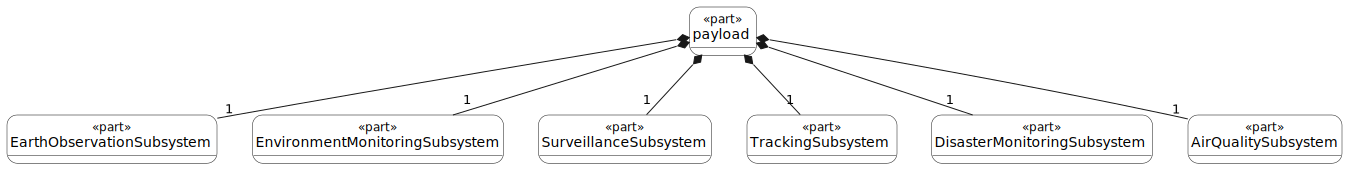

In [11]:
%viz  systemStructure::HighAltitudePlatformSystem::payload

In [3]:
package portSample{
    part def Data;
    part def Signal;
    

   port def DataOutPort {
        
        out item sendData: Data;
        in item receiveData : Data;
   }

    port def DataInPort {
       
       out item receiveData: Data;
       in item sendData : Data;
    }
    port def SignalOutPort {
        
        out item sendSignal: Signal;
        in item receiveSignal : Signal;
   }

    port def SignalInPort {
       
       out item receiveSignal: Signal;
       in item sendSignal : Signal;
    }

     
       }

Package portSample (cc150127-966f-4dc8-aa48-8bad5527c174)


In [4]:
package internalsystemStructure  {
    
    import portSample ::*;

  part def HighAltitudePlatformSystem {
    part payload {
        part EarthObservationSubsystem{
            port dataOutPort : DataOutPort;
            port signalInPort : SignalInPort;
       
        flow of Data
            from EarthObservationSubsystem.dataOutPort.receiveData
            to dataProcessingSubsystem.dataInPort.receiveData;
            
          }
        

          part EnvironmentMonitoringSubsystem {
             port dataOutPort : DataOutPort;
              port signalInPort : SignalInPort;
        flow of Data
            from EnvironmentMonitoringSubsystem.dataOutPort.receiveData
            to dataProcessingSubsystem.dataInPort.receiveData;
            
          }
         part SurveillanceSubsystem {
            port dataOutPort : DataOutPort;
                   port signalInPort : SignalInPort;
         flow of Data
            from SurveillanceSubsystem.dataOutPort.receiveData
            to dataProcessingSubsystem.dataInPort.receiveData;
             
          }

          part TrackingSubsystem {
             port dataOutPort : DataOutPort;
              port signalInPort : SignalInPort;
              attribute trackingAccuracy;
               flow of Data
            from TrackingSubsystem.dataOutPort.receiveData
            to dataProcessingSubsystem.dataInPort.receiveData;
             
          }

          part DisasterMonitoringSubsystem {
             port dataOutPort : DataOutPort;
             port signalInPort : SignalInPort;
              attribute responseTime;
              
        flow of Data
            from DisasterMonitoringSubsystem.dataOutPort.receiveData
            to dataProcessingSubsystem.dataInPort.receiveData;
          }

          part AirQualitySubsystem {
            port signalInPort : SignalInPort;
              attribute pollutantDetectionLimit;
       
          }
          part dataProcessingSubsystem {
              port signalOutPort : SignalOutPort;
              port dataInPort : DataInPort;
         flow of Data
            from dataProcessingSubsystem.dataInPort.sendData
            to EarthObservationSubsystem.dataOutPort.receiveData;
               flow of Data
            from dataProcessingSubsystem.dataInPort.sendData
            to EnvironmentMonitoringSubsystem.dataOutPort.receiveData;
               flow of Data
            from dataProcessingSubsystem.dataInPort.sendData
            to SurveillanceSubsystem.dataOutPort.receiveData;
               flow of Data
            from dataProcessingSubsystem.dataInPort.sendData
            to TrackingSubsystem.dataOutPort.receiveData;
          }
        
       

    }
}
}

Package internalsystemStructure (cef0daf3-5b75-405e-b4b3-a7543a9a1785)


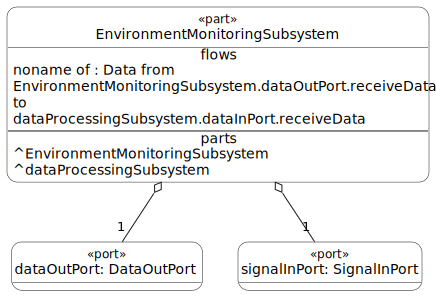

In [17]:
%viz internalsystemStructure::HighAltitudePlatformSystem::payload::EnvironmentMonitoringSubsystem

In [5]:
package MoEs{
   part def HAPsystem {
        import ISQ::*;
    import ScalarValues::Integer;
       
       
        import ScalarValues::Integer;  
        import ScalarValues::Real;   
        attribute weight : Real;
        attribute data :Integer; 
        attribute datadistance :Integer;
        attribute power: Integer;
        attribute temperature : Real;
        attribute altitude :Integer;
        //attribute totalWeight: Real;
        //attribute powerSolar:Integer;
        //attribute time;
        //attribute image;
       
    }
   
}

Package MoEs (98e94fc6-5c62-4460-9ec6-f592480266db)


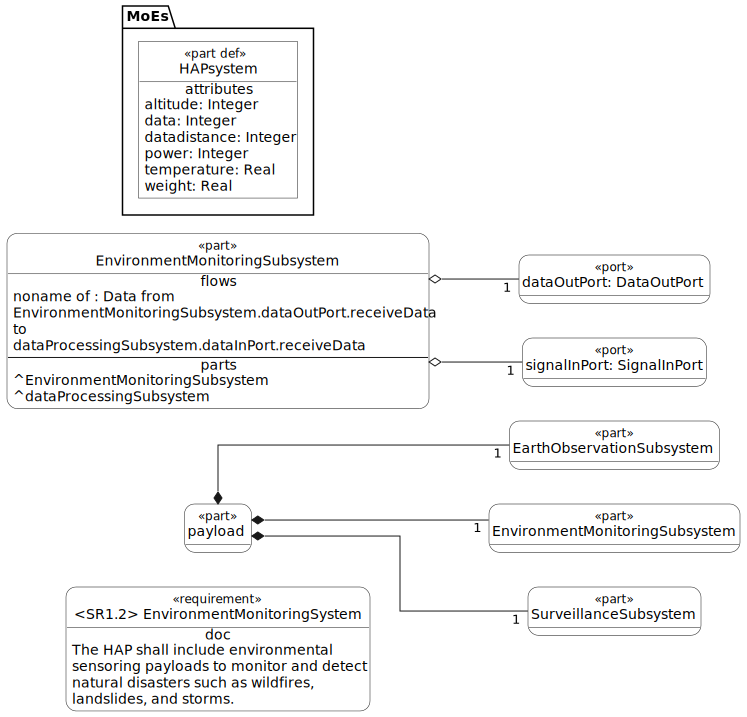

In [7]:
%viz --view MIXED --style ORTHOLINE --style LR  SystemRequirements::HAPSystemRequirements::FunctionalRequirements::EnvironmentMonitoringSystem systemStructure::HighAltitudePlatformSystem::payload  internalsystemStructure::HighAltitudePlatformSystem::payload::EnvironmentMonitoringSubsystem MoEs 

In [19]:
%viz -h

Usage: %viz [--view=<VIEW>] [--style=<STYLE>...] <NAME> [<NAME>...]

Visualize model elements of <NAME>(s). <NAME>s must be fully qualified.

<VIEW> is case insensitive and possible candidates are:
   DEFAULT		Automatically choose an appropriate view from the given model element names
   TREE			Show a tree-structural view, like a Block Definition Diagram (BDD)
   INTERCONNECTION	Show an interconnection view, like an Internal Block Diagram (IBD)
   STATE		Show state machines
   ACTION		Show actions like an activity diagram
   SEQUENCE		Show events and messages in a sequence diagram
   MIXED		Show multiple views

<STYLE> is also case insensitive. Multiple --style options are allowed.  The possible style names are:
  DEFAULT		Standard B&&W
  STDCOLOR		Standard style with colors
  PLANTUML		PlantUML Style
  TB			Top-to-Bottom orientation
  LR			Left-to-Right orientation
  POLYLINE		Polyline style
  ORTHOLINE		Orthogonal line style
  SHOWLIB		Show elements of the standard libraries
  SHOWIN